In [59]:
import pandas as pd

In [3]:
# Датасет с данными об играх и их продажах
data = pd.read_csv('vgsales.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<AxesSubplot:title={'center':'Наиболее популярные жанры видеоигр, выпущенных до 2000 года'}, xlabel='Жанр видеоигры', ylabel='Число выпущенных видеоигр до 2000 г.'>

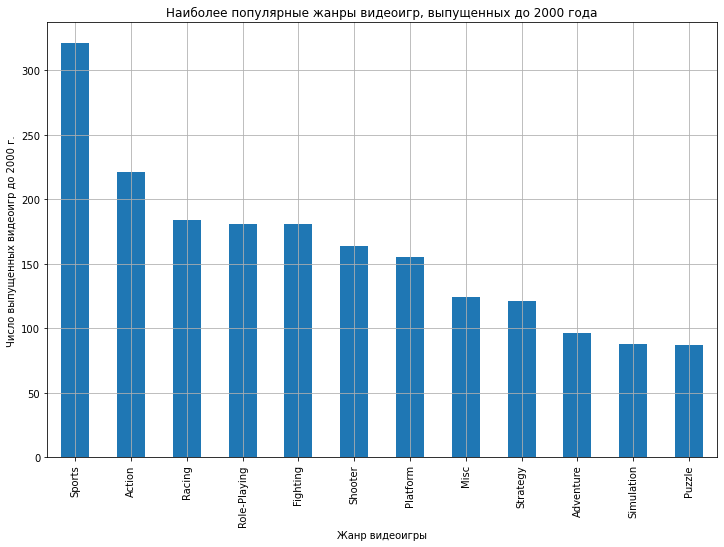

In [61]:
# Наиболее популярные жанры игр, выпущенных до 2000 года
popular_before_2000 = data[data["Year"] < 2000].drop_duplicates(subset = ['Name', "Year"], keep = 'first')
popular_before_2000[popular_before_2000['Year'] < 2000]['Genre'].value_counts().plot.bar(figsize = (12, 8), xlabel='Жанр видеоигры', ylabel='Число выпущенных видеоигр до 2000 г.', title='Наиболее популярные жанры видеоигр, выпущенных до 2000 года', grid=True)

<AxesSubplot:title={'center':'Наиболее популярные жанры видеоигр, выпущенных после 2000 года'}, xlabel='Жанр видеоигры', ylabel='Число выпущенных видеоигр после 2000 г.'>

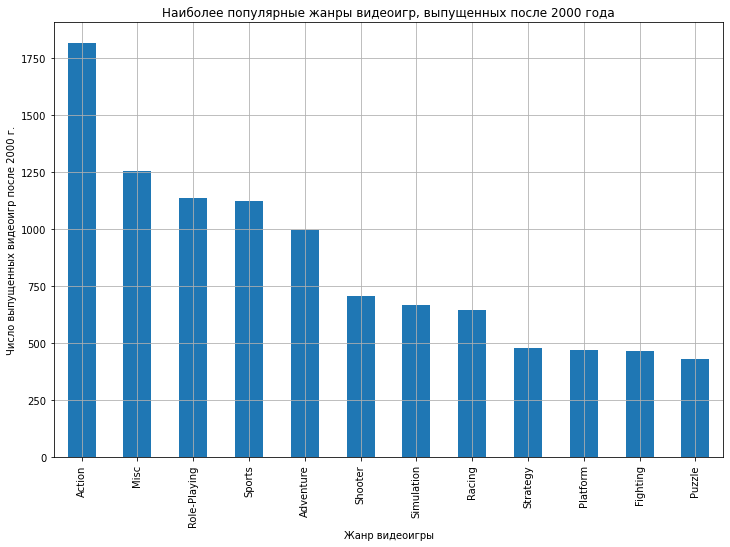

In [62]:
# Наиболее популярные жанры игр, выпущенных после 2000 года
popular_after_2000 = data[data["Year"] >= 2000].drop_duplicates(subset = ['Name', 'Year'], keep = 'first')
popular_after_2000[popular_after_2000['Year'] >= 2000]['Genre'].value_counts().plot.bar(figsize = (12, 8), xlabel='Жанр видеоигры', ylabel='Число выпущенных видеоигр после 2000 г.', title='Наиболее популярные жанры видеоигр, выпущенных после 2000 года', grid=True)

<AxesSubplot:title={'center':'Жанры видеоигр с наибольшим числом продаж в мире до 2000 года'}, xlabel='Жанр видеоигры', ylabel='Число проданных видеоигр до 2000 г.'>

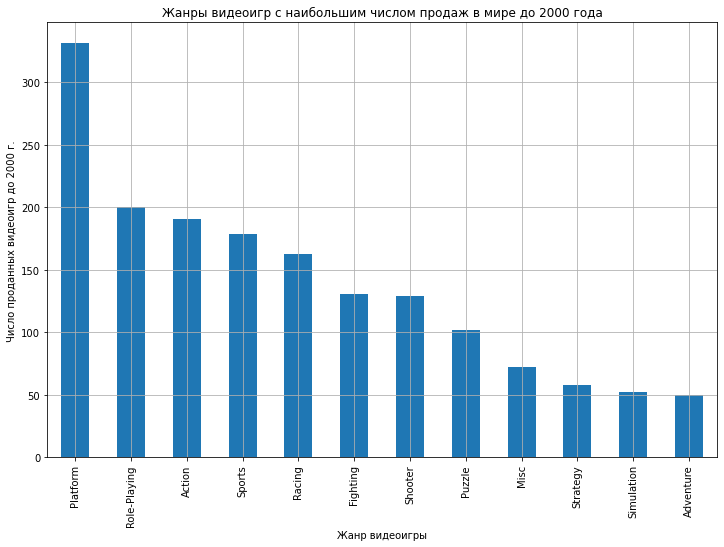

In [63]:
# Жанры игр, у которых было наибольшее число продаж в мире до 2000 года
saled_before_2000 = data[data['Year'] < 2000]
saled_before_2000 = saled_before_2000.groupby('Genre')['Global_Sales'].sum()

saled_before_2000.sort_values(ascending=False).plot.bar(figsize = (12, 8), xlabel='Жанр видеоигры', ylabel='Число проданных видеоигр до 2000 г.', title='Жанры видеоигр с наибольшим числом продаж в мире до 2000 года', grid=True)

<AxesSubplot:title={'center':'Жанры видеоигр с наибольшим числом продаж в мире после 2000 года'}, xlabel='Жанр видеоигры', ylabel='Число проданных видеоигр после 2000 г.'>

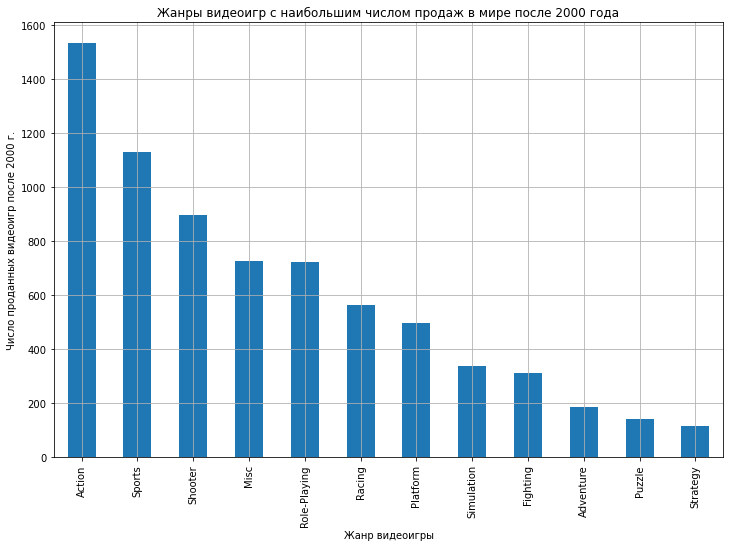

In [64]:
# Жанры игр, у которых было наибольшее число продаж в мире после 2000 года
saled_after_2000 = data[data['Year'] >= 2000]
saled_after_2000 = saled_after_2000.groupby('Genre')['Global_Sales'].sum()

saled_after_2000.sort_values(ascending=False).plot.bar(figsize = (12, 8), xlabel='Жанр видеоигры', ylabel='Число проданных видеоигр после 2000 г.', title='Жанры видеоигр с наибольшим числом продаж в мире после 2000 года', grid=True)

<AxesSubplot:title={'center':'Общее число видеоигр, выпущенных в каждом году'}, xlabel='Год', ylabel='Число выпущенных видеоигр'>

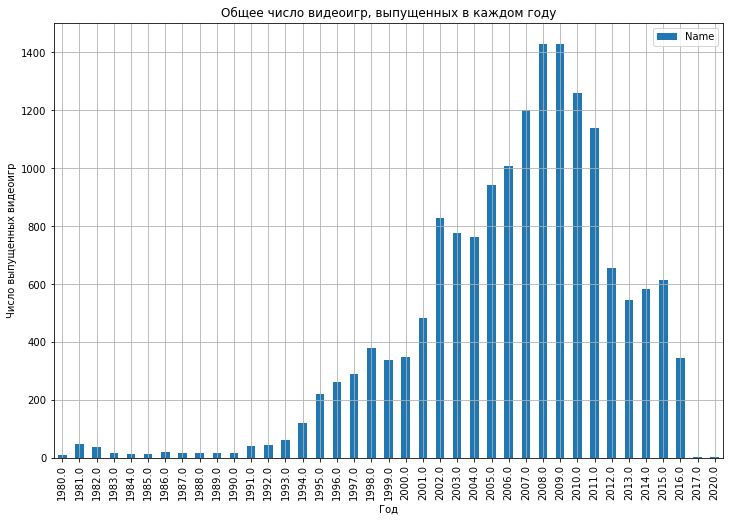

In [46]:
# Общее число видеоигр, выпущенных в каждом году
data.groupby(data['Year']).agg({'Name' : 'count'}).plot.bar(figsize = (12, 8), xlabel='Год', ylabel='Число выпущенных видеоигр', title='Общее число видеоигр, выпущенных в каждом году', grid=True)

['Electronic Arts', 'Activision', 'Namco Bandai Games']


<AxesSubplot:title={'center':'Число видеоигр для платформ, выпущенных 3 крупнейшими издателями'}, xlabel='Игровая платформа', ylabel='Число выпущенных видеоигр'>

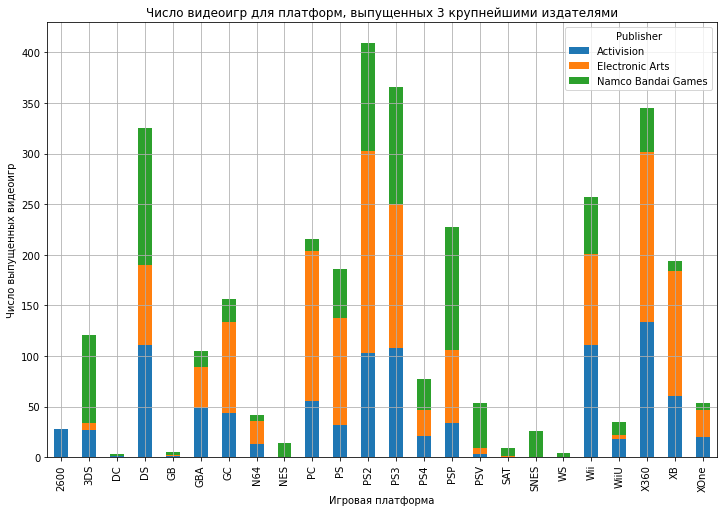

In [65]:
# 3 издателя, выпустившие наибольшее количество видеоигр
max_games_publishers = data['Publisher'].value_counts()[:3]
print(max_games_publishers.index.tolist())

# 3 издателя, выпустившие наибольшее количество видеоигр, число их видеоигр по платформам
publishers_indexes = data[data['Publisher'].isin(max_games_publishers.index.tolist())]
pd.crosstab(publishers_indexes['Platform'], publishers_indexes['Publisher']).plot.bar(figsize = (12, 8), xlabel='Игровая платформа', ylabel='Число выпущенных видеоигр', title='Число видеоигр для платформ, выпущенных 3 крупнейшими издателями', grid=True, stacked=True)

<AxesSubplot:title={'center':'Число видеоигр, выпущенных всеми издателями для платформ'}, xlabel='Игровая платформа', ylabel='Число выпущенных видеоигр'>

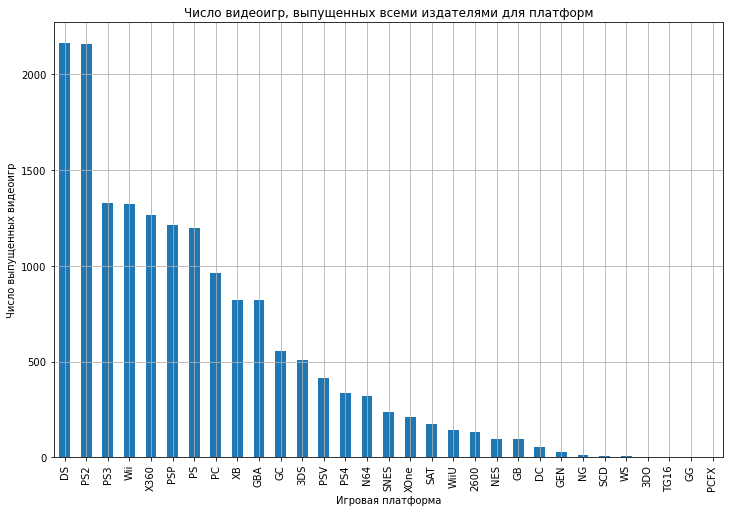

In [48]:
# Количество видеоигр, выпущенных всеми издателями для каждой платформы
pd.crosstab(publishers_indexes['Platform'], publishers_indexes['Publisher'])
data.Platform.value_counts().plot.bar(figsize = (12, 8), xlabel='Игровая платформа', ylabel='Число выпущенных видеоигр', title='Число видеоигр, выпущенных всеми издателями для платформ', grid=True)

4. Отобразите на круговых диаграммах доли суммарного объема продаж с 
1980г. до 2000г. и с 2000г. до 2020г. в Северной Америке, Европе, Японии 
от объема продаж по всему миру.

<AxesSubplot:title={'center':'Объем продаж видеоигр по странам с 1980 по 2000, %'}, ylabel='Объем продаж, %'>

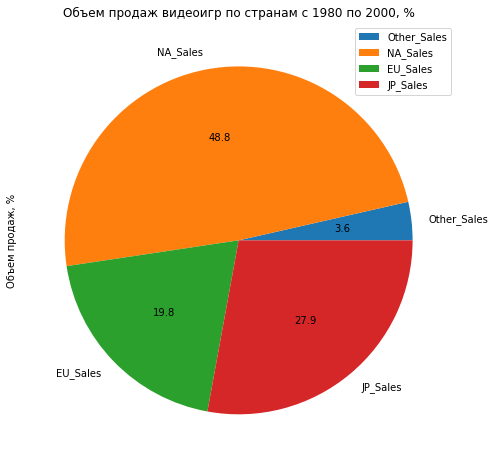

In [68]:
# Суммарный объем продаж видеоигр с 1980 по 2000 в процентах

data[(data['Year'] >= 1980) & (data['Year'] <= 2000)][['Other_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().plot.pie(ylabel='Объем продаж, %', figsize = (12, 8), title='Объем продаж видеоигр по странам с 1980 по 2000, %', legend=True, autopct='%.1f')

<AxesSubplot:title={'center':'Объем продаж видеоигр по странам с 2000 по 2020, %'}, ylabel='Объем продаж, %'>

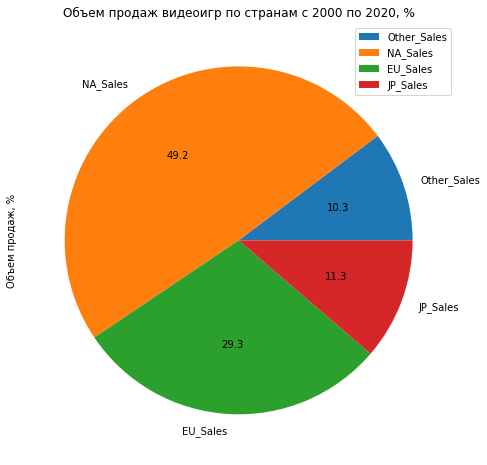

In [69]:
# Суммарный объем продаж видеоигр с 2000 по 2020

data[(data['Year'] >= 2000) & (data['Year'] <= 2020)][['Other_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().plot.pie(ylabel='Объем продаж, %', figsize = (12, 8), title='Объем продаж видеоигр по странам с 2000 по 2020, %', legend=True, autopct='%.1f')